# Notebook Imports and Packages

In [273]:
import matplotlib.pyplot as plt
import numpy as np
from math import log

from matplotlib import cm
from sympy import symbols, diff
from sklearn.linear_model import LinearRegression

%matplotlib inline

# Example 1 - A simple cost function
## $$f(x)= x^2 + x + 1$$

In [274]:
def f(x):
    return x**2 + x + 1

In [275]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

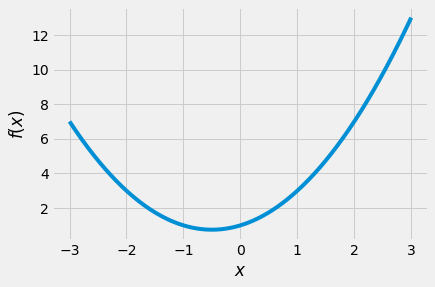

In [276]:
# Plot
plt.style.use("fivethirtyeight")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")

plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives

In [277]:
def df(x):
    return 2*x + 1

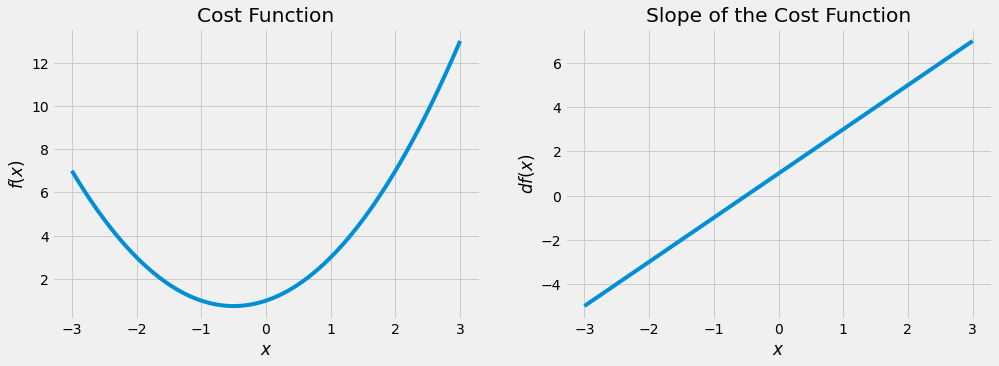

In [278]:
# Plot function and derivative

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.title("Cost Function")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.plot(x_1, f(x_1))

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title("Slope of the Cost Function")
plt.plot(x_1, df(x_1))
plt.xlabel("$x$")
plt.ylabel("$df(x)$")

plt.show()

## Python Loops & Gradient Descent

In [279]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multipier = 0.1
precision = 0.000000000001

x_list = [new_x]
slope_list = [df(new_x)]
step = 0

while df(new_x) > precision:
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multipier * gradient
    x_list.append(new_x)
    slope_list.append(df(new_x))
    step += 1
    
print(f"Local minimum occurs at: {new_x}")
print(f"Slope or df(x) value at this point is: {df(new_x)}")
print(f"f(x) value or cost at this point: {f(new_x)}")
print(f"Steps: {step}")

Local minimum occurs at: -0.49999999999954814
Slope or df(x) value at this point is: 9.037215420448774e-13
f(x) value or cost at this point: 0.75
Steps: 133


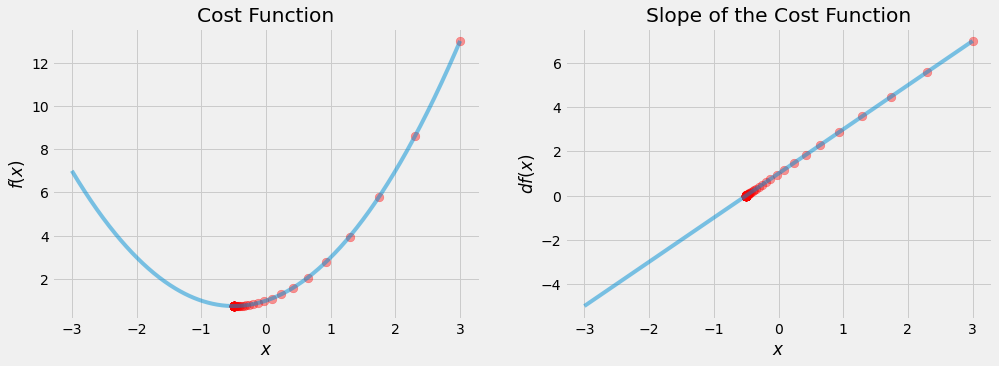

In [280]:
# Plot function and derivative

plt.figure(figsize=[15, 5])
values = np.array(x_list)

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.title("Cost Function")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.plot(x_1, f(x_1), alpha=0.5)

plt.scatter(values, f(values), color="red", s=75, alpha=0.4)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title("Slope of the Cost Function")
plt.plot(x_1, df(x_1), alpha=0.5)
plt.xlabel("$x$")
plt.ylabel("$df(x)$")
plt.scatter(values, df(values), color="red", s=75, alpha=0.4)

plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [281]:
# Make data
x_2 = np.linspace(-2, 2, 1000)

In [282]:
def g(x):
    return x**4 - 4*x**2 + 5

In [283]:
def dg(x):
    return 4*x**3 - 8*x

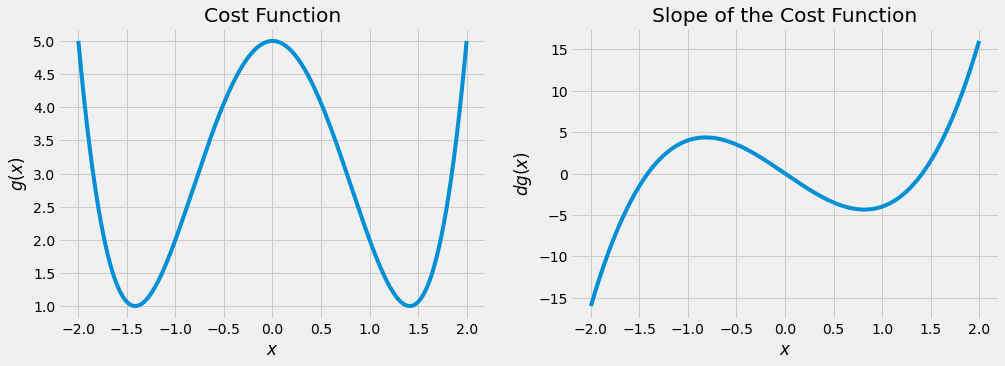

In [284]:
# Plot function and derivative

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.title("Cost Function")
plt.xlabel("$x$")
plt.ylabel("$g(x)$")
plt.plot(x_2, g(x_2))

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title("Slope of the Cost Function")
plt.plot(x_2, dg(x_2))
plt.xlabel("$x$")
plt.ylabel("$dg(x)$")

plt.show()

## Gradient Descent as a Python Function

In [285]:
def gradient_descent(derivative_func, initial_guess, l_r_multiplier=0.02, precision=0.0001,
                     max_iter=500):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]
    num_of_steps = 0

    while num_of_steps < max_iter:
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - l_r_multiplier * gradient
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        num_of_steps += 1
        if gradient < precision:
            break
    
    return new_x, x_list, slope_list, num_of_steps

In [286]:
local_min, list_x, deriv_list, steps = gradient_descent(derivative_func=dg, initial_guess=0.5,
                                                 l_r_multiplier=0.02, precision=0.00001)
print(f"Local minimum occurs at: {local_min}")
print(f"Slope or dg(x) value at this point is: {dg(local_min)}")
print(f"g(x) value or cost at this point: {g(local_min)}")

Local minimum occurs at: 0.5700000000000001
Slope or dg(x) value at this point is: -3.8192280000000003
g(x) value or cost at this point: 3.8059600099999997


In [287]:
local_min, list_x, deriv_list, steps = gradient_descent(derivative_func=dg, initial_guess=-0.5,
                                                 l_r_multiplier=0.02, precision=0.00001)
print(f"Local minimum occurs at: {local_min}")
print(f"Slope or dg(x) value at this point is: {dg(local_min)}")
print(f"g(x) value or cost at this point: {g(local_min)}")

Local minimum occurs at: -1.4142131527974837
Slope or dg(x) value at this point is: 6.553206933546107e-06
g(x) value or cost at this point: 1.0000000000013416


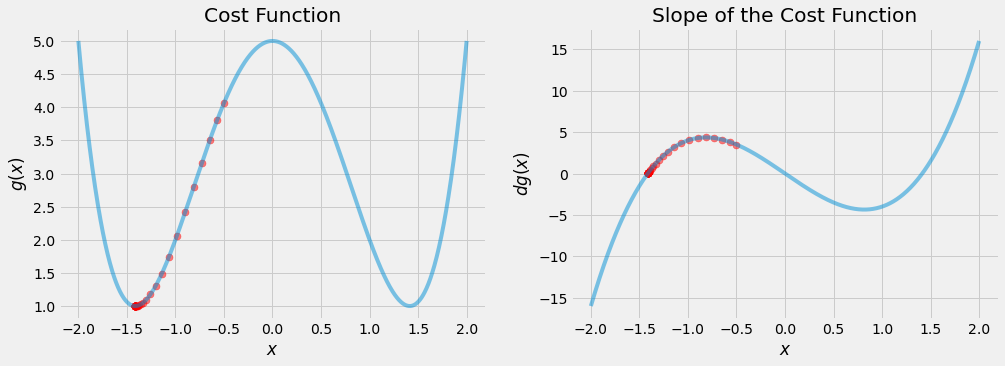

44


In [288]:
# Derivative function
local_min, list_x, deriv_list, steps = gradient_descent(derivative_func=dg, initial_guess=-0.5,
                                                 l_r_multiplier=0.02, precision=0.00001)

# Plot function and derivative

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.title("Cost Function")
plt.xlabel("$x$")
plt.ylabel("$g(x)$")
plt.plot(x_2, g(x_2), alpha = 0.5)
plt.scatter(list_x, g(np.array(list_x)), color="red", s=50, alpha =0.5)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title("Slope of the Cost Function")
plt.plot(x_2, dg(x_2), alpha = 0.5)
plt.scatter(list_x, dg(np.array(list_x)), color="red", s=50, alpha =0.5)
plt.xlabel("$x$")
plt.ylabel("$dg(x)$")

plt.show()

print(steps)

# Example 3 - Divergence, Overflow and Python Tuples
## $$h(x) = x^5 - 2x^4 + 2$$

In [289]:
# Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

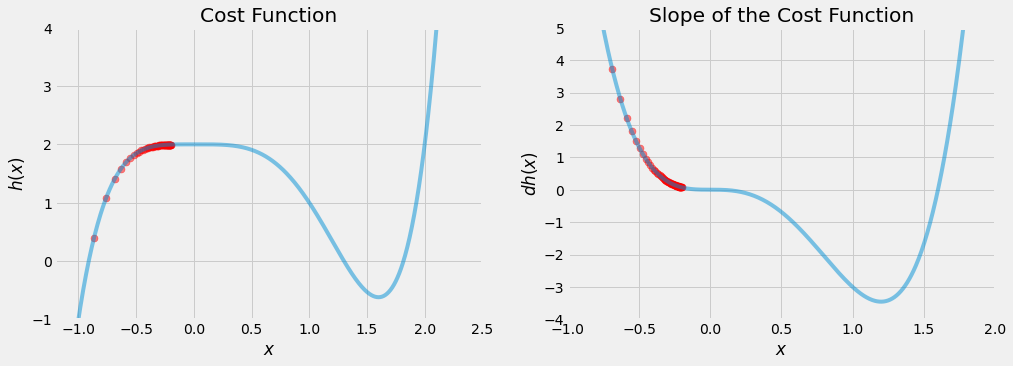

Local minimum: -2071072.4470816324
h(x) value or cost at this point: -3.810455326061589e+31
Number of steps: 70


In [290]:
# Derivative function
local_min, list_x, deriv_list, steps = gradient_descent(derivative_func=dh, initial_guess=-0.2,
                                                        max_iter=70)

# Plot function and derivative

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title("Cost Function")
plt.xlabel("$x$")
plt.ylabel("$h(x)$")
plt.plot(x_3, h(x_3), alpha = 0.5)
plt.scatter(list_x, h(np.array(list_x)), color="red", s=50, alpha =0.5)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.title("Slope of the Cost Function")
plt.plot(x_3, dh(x_3), alpha = 0.5)
plt.scatter(list_x, dh(np.array(list_x)), color="red", s=50, alpha =0.5)
plt.xlabel("$x$")
plt.ylabel("$dh(x)$")

plt.show()

print(f"Local minimum: {local_min}")
print(f"h(x) value or cost at this point: {h(local_min)}")
print(f"Number of steps: {steps}")

In [291]:
import sys
sys.float_info.max

1.7976931348623157e+308

# Example 4 - Data Viz with 3D Charts

## Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$
Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [292]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [293]:
# Make data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print(f"Shape of x {x_4.shape}")

x_4, y_4 = np.meshgrid(x_4, y_4)

print(f"Shape of x {x_4.shape}")

Shape of x (200,)
Shape of x (200, 200)


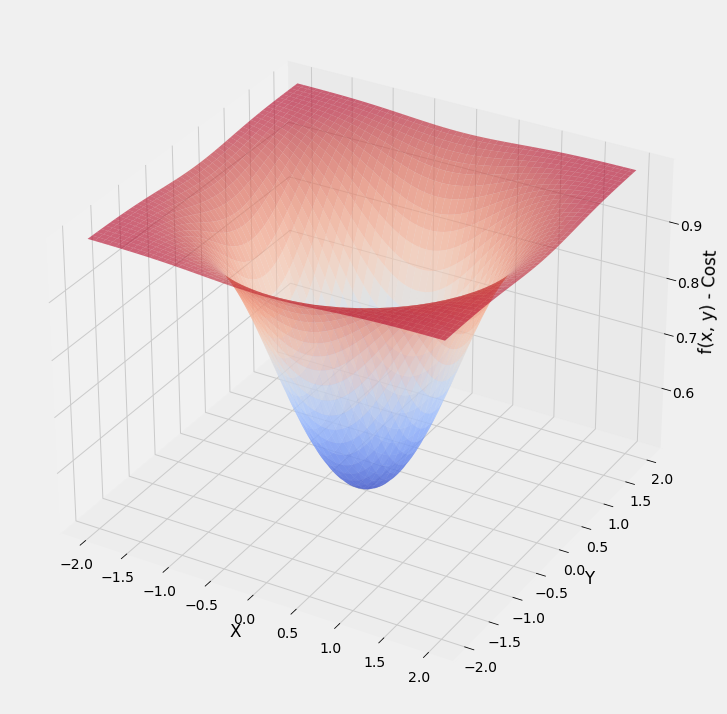

In [294]:
# Gen 3d plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection="3d")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("f(x, y) - Cost")

ax.plot_surface(x_4, y_4, f(x_4, y_4), alpha = 0.6, cmap=cm.coolwarm)

plt.show()

## Partial Derivatives & Symbolic Computation

### $$\frac{\partial f}{\partial x} =
\frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 -y^2} + 1 \right)^2}$$

### $$\frac{\partial f}{\partial y} =
\frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 -y^2} + 1 \right)^2}$$

In [295]:
a, b = symbols("x, y")
print(f"Cost function: {f(a, b)}")
print(f"Partial derivative with respect of x: {diff(f(a, b), a)}")
print(f"Partial derivative with respect of y: {diff(f(a, b), b)}")
print(f"Value of f(x, y) at x=1.8, y=1: {f(a, b).evalf(subs={a: 1.8, b: 1.0})}")
print(f"Value of df(x, y) by x at x=1.8, y=1: {diff(f(a, b), a).evalf(subs={a: 1.8, b: 1.0})}")
print(f"Value of df(x, y) by y at x=1.8, y=1: {diff(f(a, b), b).evalf(subs={a: 1.8, b: 1.0})}")

Cost function: 1/(3**(-x**2 - y**2) + 1)
Partial derivative with respect of x: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Partial derivative with respect of y: 2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x, y) at x=1.8, y=1: 0.990604794032582
Value of df(x, y) by x at x=1.8, y=1: 0.0368089716197505
Value of df(x, y) by y at x=1.8, y=1: 0.0204494286776392


## Batch Gradient Descent with SymPy

In [296]:
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*(r) / (r + 1)**2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1)**2


In [297]:
fpx(1.8, 1)

0.036808971619750504

In [298]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    
    params = params - multiplier * gradients
    
print(n)
    
# Results
print(f"Values in gradient array: {gradients}")
print(f"Minimum occure at x value of: {params[0]}")
print(f"Minimum occure at y value of: {params[1]}")
print(f"The cost: {f(params[0], params[1])}")

499
Values in gradient array: [2.01013038e-11 1.11673910e-11]
Minimum occure at x value of: 3.458385998858304e-11
Minimum occure at y value of: 1.9213255549212797e-11
The cost: 0.5


## Graphing 3D Gradient Descent & Adv Numpy Arrays

In [299]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial guess
values_array = params.reshape(1, 2)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_array = np.append(arr=values_array, values=params.reshape(1, 2), axis=0)
    
print(f"Iterations: {n}")
    
# Results
print(f"Values in gradient array: {gradients}")
print(f"Minimum occure at x value of: {params[0]}")
print(f"Minimum occure at y value of: {params[1]}")
print(f"The cost: {f(params[0], params[1])}")

print(values_array)

Iterations: 499
Values in gradient array: [2.01013038e-11 1.11673910e-11]
Minimum occure at x value of: 3.458385998858304e-11
Minimum occure at y value of: 1.9213255549212797e-11
The cost: 0.5
[[1.80000000e+00 1.00000000e+00]
 [1.79631910e+00 9.97955057e-01]
 [1.79257650e+00 9.95875836e-01]
 ...
 [3.87209563e-11 2.15116424e-11]
 [3.65939904e-11 2.03299946e-11]
 [3.45838600e-11 1.92132555e-11]]


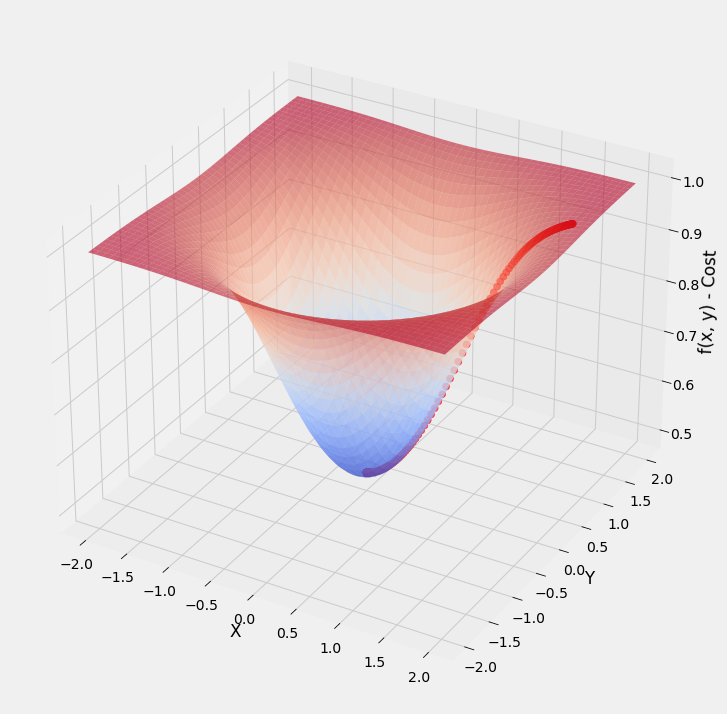

In [300]:
# Gen 3d plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection="3d")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("f(x, y) - Cost")

ax.plot_surface(x_4, y_4, f(x_4, y_4), alpha = 0.6, cmap=cm.coolwarm)
ax.scatter(values_array[:, 0], values_array[:, 1], f(values_array[:, 0], values_array[:, 1]),
           s=50, color="red", alpha =0.7)

plt.show()

# Example 5 - Working with Data & a Real Cost Function
## Mean Squared Error: a cost function for regression problems
### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n}\sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$

In [301]:
# Make sample data
x_5 = np.array([0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]).reshape(7, 1)
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print(f"x_5 shape: {x_5.shape}")
print(f"y_5 shape: {y_5.shape}")

x_5 shape: (7, 1)
y_5 shape: (7, 1)


In [302]:
# Quick Linear Regression
regr = LinearRegression()
regr.fit(x_5, y_5)
print(f"Theta 0: {regr.intercept_[0]}")
print(f"Theta 1: {regr.coef_[0][0]}")

Theta 0: 0.8475351486029536
Theta 1: 1.2227264637835915


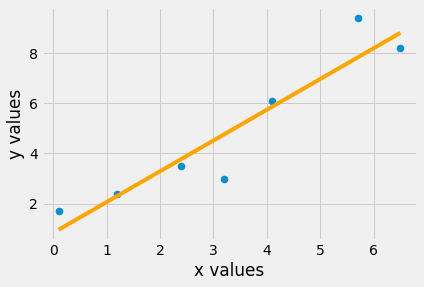

In [303]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color="orange")
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

In [304]:
# y_hat = theta0 + theta1*x
y_hat = 0.8475351486029536 + 1.2227264637835915*x_5
print("\n", y_hat)


 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]


In [305]:
def mse_calc(y, y_hat):
    return 1/len(y) * sum((y-y_hat)**2)


In [306]:
mse_calc(y_5, y_hat)

array([0.94796558])

## 3D Plot for the MSE Cost Function
### Make data for thetas

In [307]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)
plot_t0

array([[-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       ...,
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ]])

### Cals MSE using nested for loops

In [308]:
plot_cost = np.zeros((nr_thetas, nr_thetas))
for i in range(nr_thetas):
    for j in range(nr_thetas):
        # print(plot_t0[i][j])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse_calc(y_5, y_hat)
print("Shape of plot_t0", plot_t0.shape)
print("Shape of plot_t1", plot_t0.shape)
print("Shape of plot_cost", plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


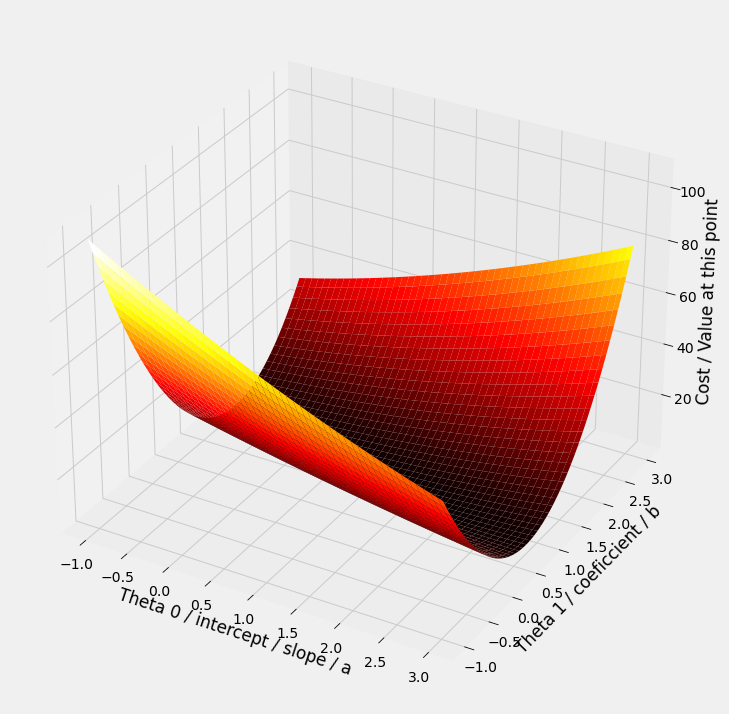

In [309]:
# Plotting MSE
fig = plt.figure(figsize=[18, 12])
ax = fig.gca(projection="3d")

ax.set_xlabel("Theta 0 / intercept / slope / a")
ax.set_ylabel("Theta 1 / coeficcient / b")
ax.set_zlabel("Cost / Value at this point")

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [310]:
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print(f"Min cost: {plot_cost.min()}")
print(f"Occurs at (i, j): {ij_min}")

Min cost: 0.9483826526747163
Occurs at (i, j): (111, 91)


## Partial Derivatives of MSE w.r.t $\theta_0$ and $\theta_1$
## $$ \frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$
## $$ \frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big(x^{(i)} \big)$$

## MSE & Gradient Descent

In [311]:
# x values, y values, appray of theta parameters
def grad(x, y , thetas):
    n = y.size


    th_0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    th_1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x) * x)

    #return np.array([th_0_slope[0], th_1_slope[1]])
    #return np.append(arr=th_0_slope, value=th_1_slope)
    return np.concatenate((th_0_slope, th_1_slope), axis=0)

In [312]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

plot_vals = thetas.reshape(1, 2)
mse_vals = mse_calc(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse_calc(y_5, thetas[0] + thetas[1]*x_5))
    
# Results
print(f"Min occurs at Theta_0 = {thetas[0]}")
print(f"Min occurs at Theta_1 = {thetas[1]}")
print(f"MSE is: {mse_calc(y_5, thetas[0] + thetas[1]*x_5)}")

Min occurs at Theta_0 = 0.8532230461743415
Min occurs at Theta_1 = 1.2214935332607393
MSE is: [0.94797511]


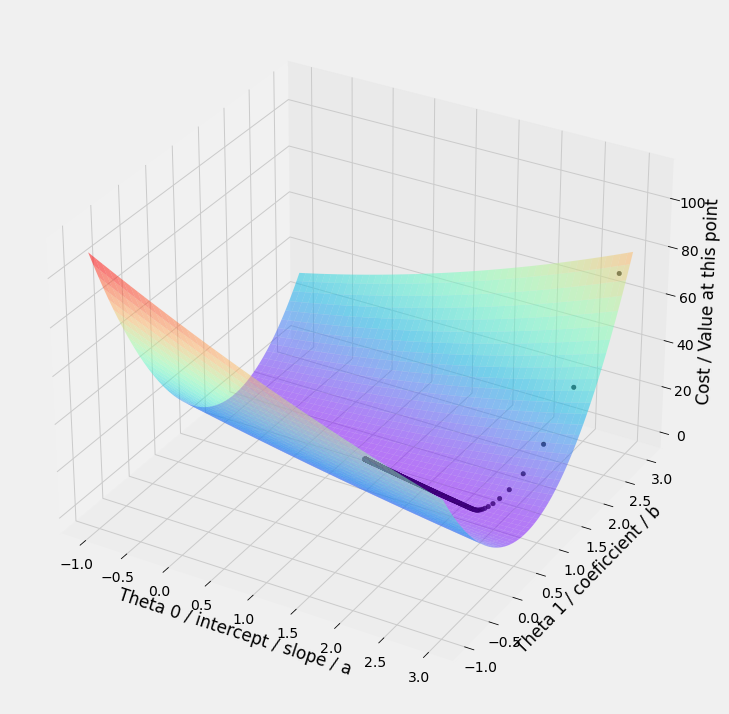

In [320]:
# Plotting MSE
fig = plt.figure(figsize=[18, 12])
ax = fig.gca(projection="3d")

ax.set_xlabel("Theta 0 / intercept / slope / a")
ax.set_ylabel("Theta 1 / coeficcient / b")
ax.set_zlabel("Cost / Value at this point")

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, color="black", alpha=0.8)
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.5)
plt.show()